#**Install Library**

In [31]:
!pip install basemap-data-hires
!pip install seaborn
!pip install basemap numpy pandas scipy
!pip install cartopy

#**Import Library**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LogNorm, Normalize
from scipy.stats import linregress
import datetime
from datetime import datetime
import seaborn as sns


#**Read Dataset**

In [33]:
dataset1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1972-1987.csv"
dataset2 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1988-1998.csv"
dataset3 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1999-2019.csv"
dataset4 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran2020-2022.csv"
# Load each dataset
df1 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1972-1987.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1988-1998.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran1999-2019.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Iran/Iran2020-2022.csv")

# Concatenate the datasets
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Display the merged DataFrame
merged_df.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
3874,2020-01-04T08:29:18.262Z,31.7534,49.9008,10.0,4.1,mb,NaN,152.0,4.844,0.58,...,2020-03-21T17:13:50.040Z,"59 km NNE of R?mhormoz, Iran",earthquake,8.4,2.0,0.145,13.0,reviewed,us,us
3875,2020-01-04T08:24:38.167Z,25.4990,63.1389,10.0,4.9,mb,NaN,97.0,6.304,0.68,...,2020-03-21T17:13:35.040Z,southwestern Pakistan,earthquake,10.0,1.9,0.079,51.0,reviewed,us,us
3876,2020-01-02T10:03:06.225Z,34.1629,60.4080,10.0,4.3,mb,NaN,116.0,1.536,1.43,...,2020-03-21T17:13:33.040Z,"72 km SSW of T?yb?d, Iran",earthquake,8.7,1.9,0.104,26.0,reviewed,us,us
3877,2020-01-02T04:29:06.582Z,34.1326,60.2681,10.0,5.5,mww,NaN,45.0,1.655,0.91,...,2022-03-04T17:36:59.119Z,"81 km SW of T?yb?d, Iran",earthquake,6.6,1.7,0.089,12.0,reviewed,us,us
3878,2020-01-01T12:59:03.756Z,30.6259,51.6449,10.0,4.2,mb,NaN,76.0,6.699,0.58,...,2020-03-21T17:13:31.040Z,"7 km SE of Yasuj, Iran",earthquake,4.5,1.9,0.098,29.0,reviewed,us,us


In [34]:
df = merged_df

# Mengonversi kolom 'time' menjadi tipe datetime
df['time'] = pd.to_datetime(df['time'])

# Menerapkan filter untuk tahun 1966 - 2016
df_filtered = df[(df['time'].dt.year >= 1966) & (df['time'].dt.year <= 2016)]

# Menampilkan DataFrame yang telah difilter
df = df_filtered
df.head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1987-12-18 20:54:33.750000+00:00,28.239,56.683,33.0,4.6,mb,NaN,NaN,NaN,0.9,...,2014-11-07T00:41:24.357Z,"115 km S of K?h Sef?d, Iran",earthquake,NaN,NaN,NaN,24.0,reviewed,us,us
1,1987-12-18 16:24:03.050000+00:00,28.191,56.677,19.8,5.9,mw,NaN,NaN,NaN,1.0,...,2022-04-27T21:27:51.633Z,"117 km NNE of Bandar Abbas, Iran",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
2,1987-11-30 03:12:37+00:00,30.990,51.170,37.7,4.8,mb,NaN,NaN,NaN,1.1,...,2014-11-07T00:41:16.294Z,"53 km NW of Yasuj, Iran",earthquake,NaN,8.0,NaN,32.0,reviewed,us,us
3,1987-11-27 08:26:43.780000+00:00,32.691,59.100,33.0,4.7,mb,NaN,NaN,NaN,0.7,...,2020-08-28T21:42:24.936Z,Eastern Iran,earthquake,NaN,NaN,NaN,26.0,reviewed,us,us
4,1987-11-25 22:53:29.970000+00:00,28.231,56.753,33.0,4.5,mb,NaN,NaN,NaN,1.0,...,2014-11-07T00:41:15.759Z,"115 km S of K?h Sef?d, Iran",earthquake,NaN,NaN,NaN,11.0,reviewed,us,us
5,1987-11-24 13:15:29.310000+00:00,32.402,58.890,33.0,4.6,mb,NaN,NaN,NaN,0.5,...,2014-11-07T00:41:15.063Z,"60 km SSW of B?rjand, Iran",earthquake,NaN,NaN,NaN,9.0,reviewed,us,us
6,1987-11-24 11:23:16.900000+00:00,32.658,59.105,40.6,5.3,mw,NaN,NaN,NaN,1.1,...,2022-04-27T21:30:18.808Z,"25 km SSW of B?rjand, Iran",earthquake,NaN,7.7,NaN,NaN,reviewed,us,hrv
7,1987-11-09 16:43:42.250000+00:00,32.805,47.799,42.1,4.9,mb,NaN,NaN,NaN,1.4,...,2014-11-07T00:41:12.852Z,"41 km ESE of ?bd?n?n, Iran",earthquake,NaN,10.0,NaN,15.0,reviewed,us,us
8,1987-11-03 14:26:41.410000+00:00,28.420,50.439,10.0,4.6,mb,NaN,NaN,NaN,1.5,...,2014-11-07T00:41:11.061Z,Persian Gulf,earthquake,NaN,NaN,NaN,3.0,reviewed,us,us
9,1987-10-28 21:47:25.220000+00:00,27.627,56.374,45.8,4.7,mb,NaN,NaN,NaN,0.6,...,2014-11-07T00:41:07.614Z,"49 km N of Bandar Abbas, Iran",earthquake,NaN,7.2,NaN,19.0,reviewed,us,us


In [35]:
# Mengambil hanya kolom yang diinginkan
selected_columns = ['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'net', 'id', 'updated', 'type', 'status', 'locationSource', 'magSource']
df_selected_columns = df[selected_columns]

# Menampilkan DataFrame yang hanya berisi kolom yang dipilih
df = df_selected_columns
df.head(10)

,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource
0,1987-12-18 20:54:33.750000+00:00,28.239,56.683,33.0,4.6,mb,us,usp0003bda,2014-11-07T00:41:24.357Z,earthquake,reviewed,us,us
1,1987-12-18 16:24:03.050000+00:00,28.191,56.677,19.8,5.9,mw,us,usp0003bd4,2022-04-27T21:27:51.633Z,earthquake,reviewed,us,hrv
2,1987-11-30 03:12:37+00:00,30.990,51.170,37.7,4.8,mb,us,usp0003apk,2014-11-07T00:41:16.294Z,earthquake,reviewed,us,us
3,1987-11-27 08:26:43.780000+00:00,32.691,59.100,33.0,4.7,mb,us,usp0003am3,2020-08-28T21:42:24.936Z,earthquake,reviewed,us,us
4,1987-11-25 22:53:29.970000+00:00,28.231,56.753,33.0,4.5,mb,us,usp0003ajj,2014-11-07T00:41:15.759Z,earthquake,reviewed,us,us
5,1987-11-24 13:15:29.310000+00:00,32.402,58.890,33.0,4.6,mb,us,usp0003afd,2014-11-07T00:41:15.063Z,earthquake,reviewed,us,us
6,1987-11-24 11:23:16.900000+00:00,32.658,59.105,40.6,5.3,mw,us,usp0003af8,2022-04-27T21:30:18.808Z,earthquake,reviewed,us,hrv
7,1987-11-09 16:43:42.250000+00:00,32.805,47.799,42.1,4.9,mb,us,usp0003a0e,2014-11-07T00:41:12.852Z,earthquake,reviewed,us,us
8,1987-11-03 14:26:41.410000+00:00,28.420,50.439,10.0,4.6,mb,us,usp00039v1,2014-11-07T00:41:11.061Z,earthquake,reviewed,us,us
9,1987-10-28 21:47:25.220000+00:00,27.627,56.374,45.8,4.7,mb,us,usp00039q3,2014-11-07T00:41:07.614Z,earthquake,reviewed,us,us


In [36]:
def bvalue_OLS(magnitude_series):
    magnitudes = magnitude_series.value_counts().sort_index()

    M = magnitudes.index.tolist()
    values = magnitudes.tolist()
    N = np.cumsum(values[::-1])[::-1]
    logN = np.log10(N)
    b,a = np.polyfit(M, logN, 1)
    return b*(-1)

def generate_GR_Adeli_Panakkat_features(earthquake_dataset, time_window):
    earthquake_dataset['b-value'] = earthquake_dataset['mag'].rolling(time_window).apply(func=bvalue_OLS,raw = False).shift(1)
    return earthquake_dataset

In [37]:
iran_region = df[df.mag >= 4.5].reset_index(drop = True)

In [38]:
iran_region = generate_GR_Adeli_Panakkat_features(iran_region, 40)

In [39]:
iran_region.tail()

,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource,b-value
2905,1999-02-19 18:00:13.390000+00:00,38.631,44.524,66.0,4.5,mb,us,usp000932s,2014-11-07T01:07:02.831Z,earthquake,reviewed,us,us,0.706535
2906,1999-01-29 05:22:31.090000+00:00,30.446,50.530,33.0,4.7,mb,us,usp00091w6,2014-11-07T01:06:52.284Z,earthquake,reviewed,us,us,0.704488
2907,1999-01-15 19:14:10.600000+00:00,35.350,45.163,33.0,5.1,mwc,us,usp000915f,2022-04-29T17:59:39.528Z,earthquake,reviewed,us,hrv,0.707274
2908,1999-01-15 13:46:00.750000+00:00,35.315,45.196,33.0,4.7,mb,us,usp0009155,2014-11-07T01:06:49.129Z,earthquake,reviewed,us,us,0.720223
2909,1999-01-14 22:12:49.220000+00:00,29.146,56.351,33.0,5.0,mwc,us,usp000913z,2016-11-09T21:40:25.107Z,earthquake,reviewed,us,hrv,0.724701


#**Variasi Temporal nilai b**

In [40]:
df = iran_region
# Mengonversi kolom 'time' ke tipe data datetime
df['time'] = pd.to_datetime(df['time'])

# Menambahkan kolom 'year' yang berisi tahun dari kolom 'time'
df['year'] = df['time'].dt.year

# Menampilkan lima baris pertama DataFrame
df.head(5)


,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource,b-value,year
0,1987-12-18 20:54:33.750000+00:00,28.239,56.683,33.0,4.6,mb,us,usp0003bda,2014-11-07T00:41:24.357Z,earthquake,reviewed,us,us,NaN,1987
1,1987-12-18 16:24:03.050000+00:00,28.191,56.677,19.8,5.9,mw,us,usp0003bd4,2022-04-27T21:27:51.633Z,earthquake,reviewed,us,hrv,NaN,1987
2,1987-11-30 03:12:37+00:00,30.990,51.170,37.7,4.8,mb,us,usp0003apk,2014-11-07T00:41:16.294Z,earthquake,reviewed,us,us,NaN,1987
3,1987-11-27 08:26:43.780000+00:00,32.691,59.100,33.0,4.7,mb,us,usp0003am3,2020-08-28T21:42:24.936Z,earthquake,reviewed,us,us,NaN,1987
4,1987-11-25 22:53:29.970000+00:00,28.231,56.753,33.0,4.5,mb,us,usp0003ajj,2014-11-07T00:41:15.759Z,earthquake,reviewed,us,us,NaN,1987


In [41]:
#reduksi kolom
fixkolom = iran_region[['time','latitude', 'longitude', 'depth', 'mag','magType','year','b-value']]
fixkolom.head(10)

,time,latitude,longitude,depth,mag,magType,year,b-value
0,1987-12-18 20:54:33.750000+00:00,28.239,56.683,33.0,4.6,mb,1987,NaN
1,1987-12-18 16:24:03.050000+00:00,28.191,56.677,19.8,5.9,mw,1987,NaN
2,1987-11-30 03:12:37+00:00,30.990,51.170,37.7,4.8,mb,1987,NaN
3,1987-11-27 08:26:43.780000+00:00,32.691,59.100,33.0,4.7,mb,1987,NaN
4,1987-11-25 22:53:29.970000+00:00,28.231,56.753,33.0,4.5,mb,1987,NaN
5,1987-11-24 13:15:29.310000+00:00,32.402,58.890,33.0,4.6,mb,1987,NaN
6,1987-11-24 11:23:16.900000+00:00,32.658,59.105,40.6,5.3,mw,1987,NaN
7,1987-11-09 16:43:42.250000+00:00,32.805,47.799,42.1,4.9,mb,1987,NaN
8,1987-11-03 14:26:41.410000+00:00,28.420,50.439,10.0,4.6,mb,1987,NaN
9,1987-10-28 21:47:25.220000+00:00,27.627,56.374,45.8,4.7,mb,1987,NaN


In [42]:
# Groupby & multiple aggregations
result = fixkolom.groupby('year')['b-value'].aggregate(['mean','min','max','sum'])
print(result)

          mean       min       max         sum
year                                          
1972  1.298170  0.985126  1.524837   41.541453
1973  1.394800  1.120155  1.562663   75.319176
1974  1.093078  1.068051  1.128603   21.861552
1975  1.193671  0.628776  1.539457   52.521511
1976  0.647205  0.553407  0.738104   34.949069
1977  1.081486  0.554599  1.332695  146.000614
1978  0.606842  0.504133  0.758989   38.837900
1979  0.865682  0.530964  2.141297   77.045660
1980  0.811631  0.570209  0.965955   47.886251
1981  1.182575  0.531888  2.062087   78.049962
1982  0.966745  0.687925  1.253719   39.636544
1983  1.050807  0.635833  1.398386   67.251635
1984  1.715505  1.362316  2.033567   94.352775
1985  1.040721  0.861088  1.588617   69.728278
1986  1.239981  0.952658  1.419447   59.519112
1987  0.945202  0.913344  0.965689    6.616417
1988  1.013445  0.800546  1.247776   90.196614
1989  0.671388  0.506055  0.801441   30.212454
1990  1.033550  0.543570  1.719221  127.126658
1991  1.18031

In [43]:
fixkolom = fixkolom.dropna()
fixkolom

,time,latitude,longitude,depth,mag,magType,year,b-value
40,1987-03-20 11:15:16.820000+00:00,26.483,56.758,42.9,4.6,mb,1987,0.913344
41,1987-02-23 11:23:47.490000+00:00,34.378,57.324,33.0,4.6,mb,1987,0.913344
42,1987-02-18 20:46:57.430000+00:00,26.091,57.361,33.0,4.6,mb,1987,0.960072
43,1987-01-21 20:01:06.120000+00:00,32.745,47.646,54.7,4.7,mb,1987,0.953766
44,1987-01-20 06:22:26.810000+00:00,31.975,50.743,33.0,4.6,mb,1987,0.953766
...,...,...,...,...,...,...,...,...
2905,1999-02-19 18:00:13.390000+00:00,38.631,44.524,66.0,4.5,mb,1999,0.706535
2906,1999-01-29 05:22:31.090000+00:00,30.446,50.530,33.0,4.7,mb,1999,0.704488
2907,1999-01-15 19:14:10.600000+00:00,35.350,45.163,33.0,5.1,mwc,1999,0.707274
2908,1999-01-15 13:46:00.750000+00:00,35.315,45.196,33.0,4.7,mb,1999,0.720223


In [44]:
b_tot = fixkolom.groupby("year")["b-value"].sum()

b_ave = result["sum"].mean()

#**Temporal variation using values-b**

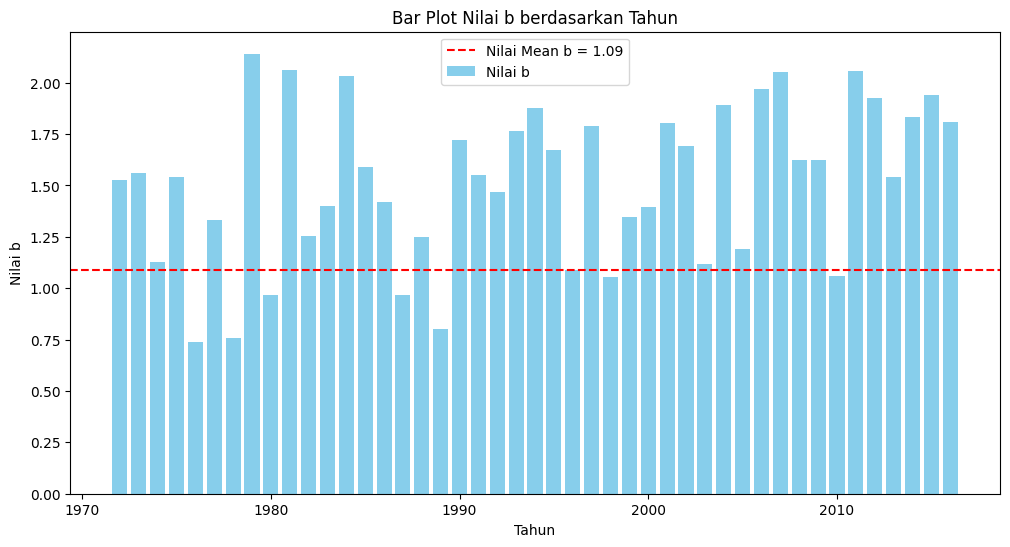

In [45]:
import matplotlib.pyplot as plt

# Filter data untuk tahun 1966 - 2016
filtered_data = fixkolom[(fixkolom['year'] >= 1966) & (fixkolom['year'] <= 2016)]

# Hitung nilai mean dari b-value
mean_b_value = filtered_data['b-value'].mean()

# Plot bar plot
plt.figure(figsize=(12, 6))
plt.bar(filtered_data['year'], filtered_data['b-value'], color='skyblue', label='Nilai b')
plt.axhline(y=mean_b_value, color='red', linestyle='--', label=f'Nilai Mean b = {mean_b_value:.2f}')
plt.xlabel('Tahun')
plt.ylabel('Nilai b')
plt.title('Bar Plot Nilai b berdasarkan Tahun')
plt.legend()
plt.show()
